In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
import pandas as pd

In [73]:
##loading the dataset
df = pd.read_csv("https://github.com/keerthi97/CODSOFT/blob/44375d210a2ed7cb4d630efe6db0023d3f72fd9c/datasets/Titanic-Dataset.csv?raw=true")

In [74]:
df.head()
len(df)
df.dtypes
df.info()
df.nunique()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


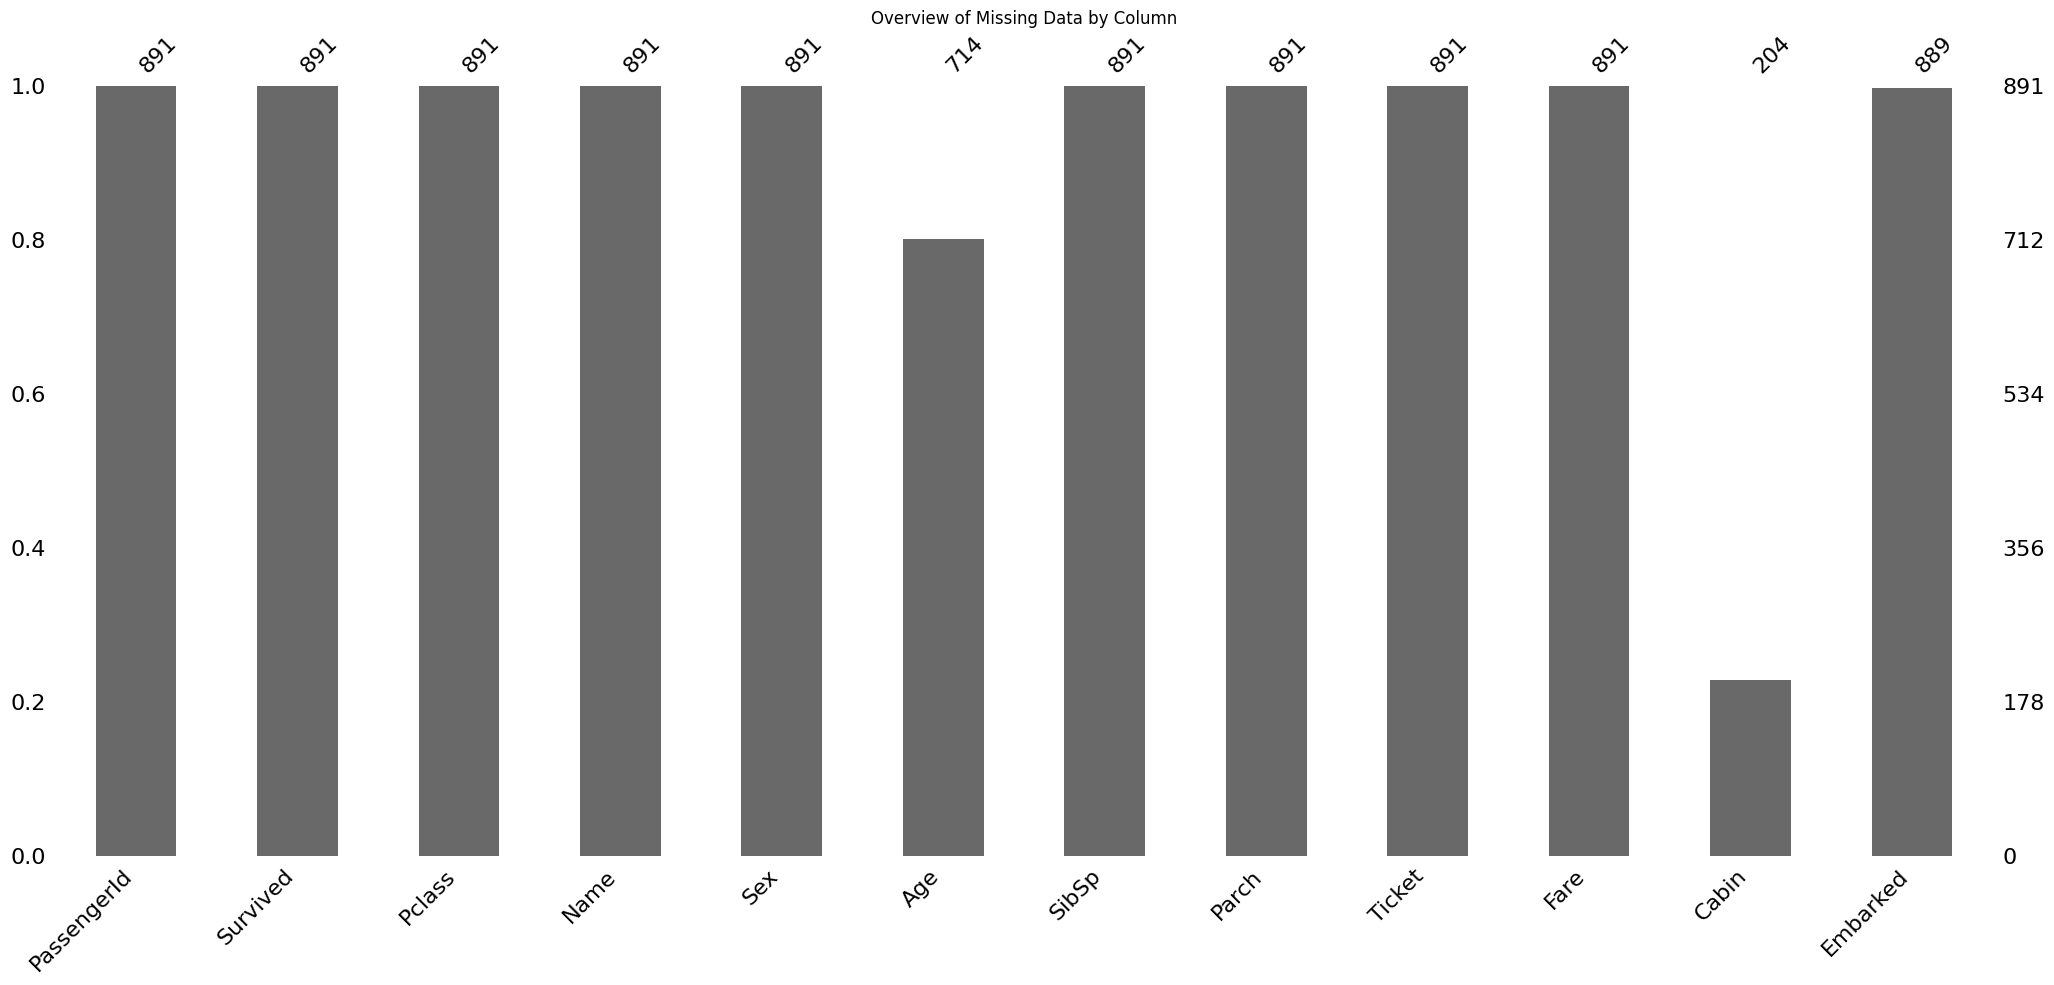

In [75]:
###Exploratory Data Analysis

###checking for missing values

# Bar Plot (Nullity by Column)

msno.bar(df)
plt.title("Overview of Missing Data by Column")
plt.show()

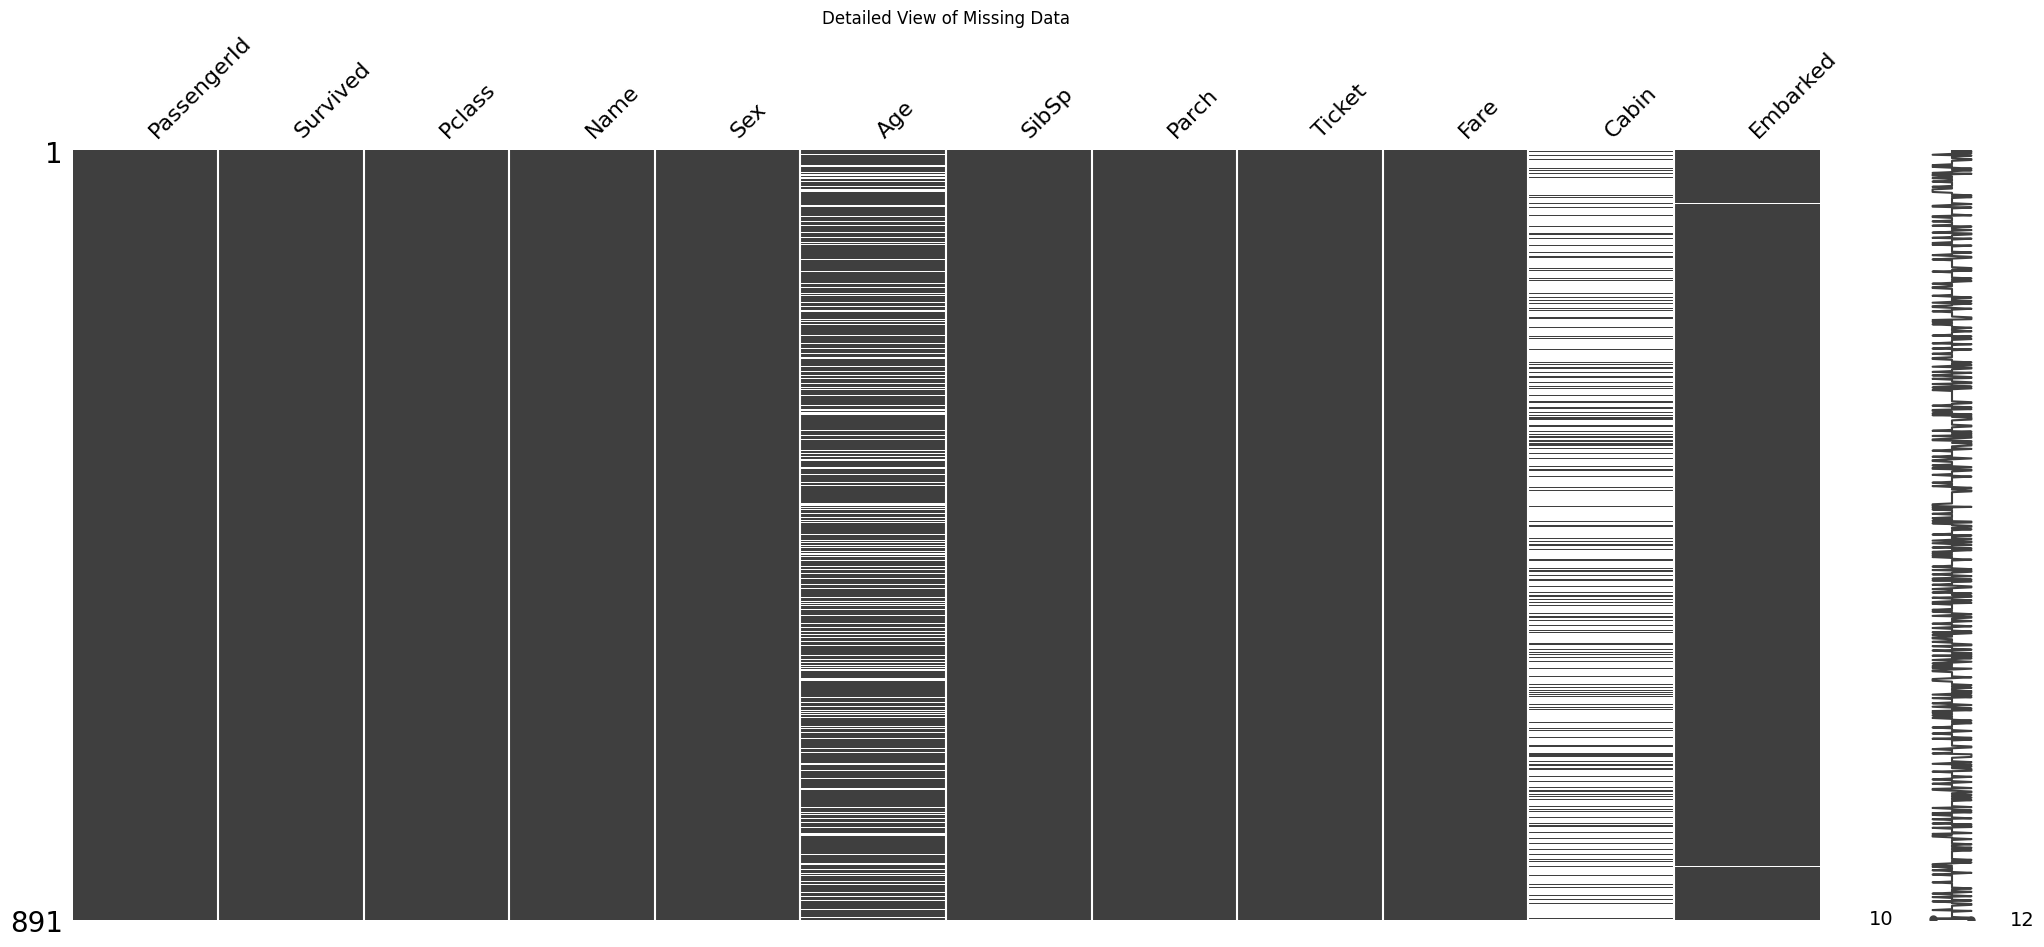

In [76]:
msno.matrix(df)
plt.title("Detailed View of Missing Data")
plt.show()

<Figure size 600x400 with 0 Axes>

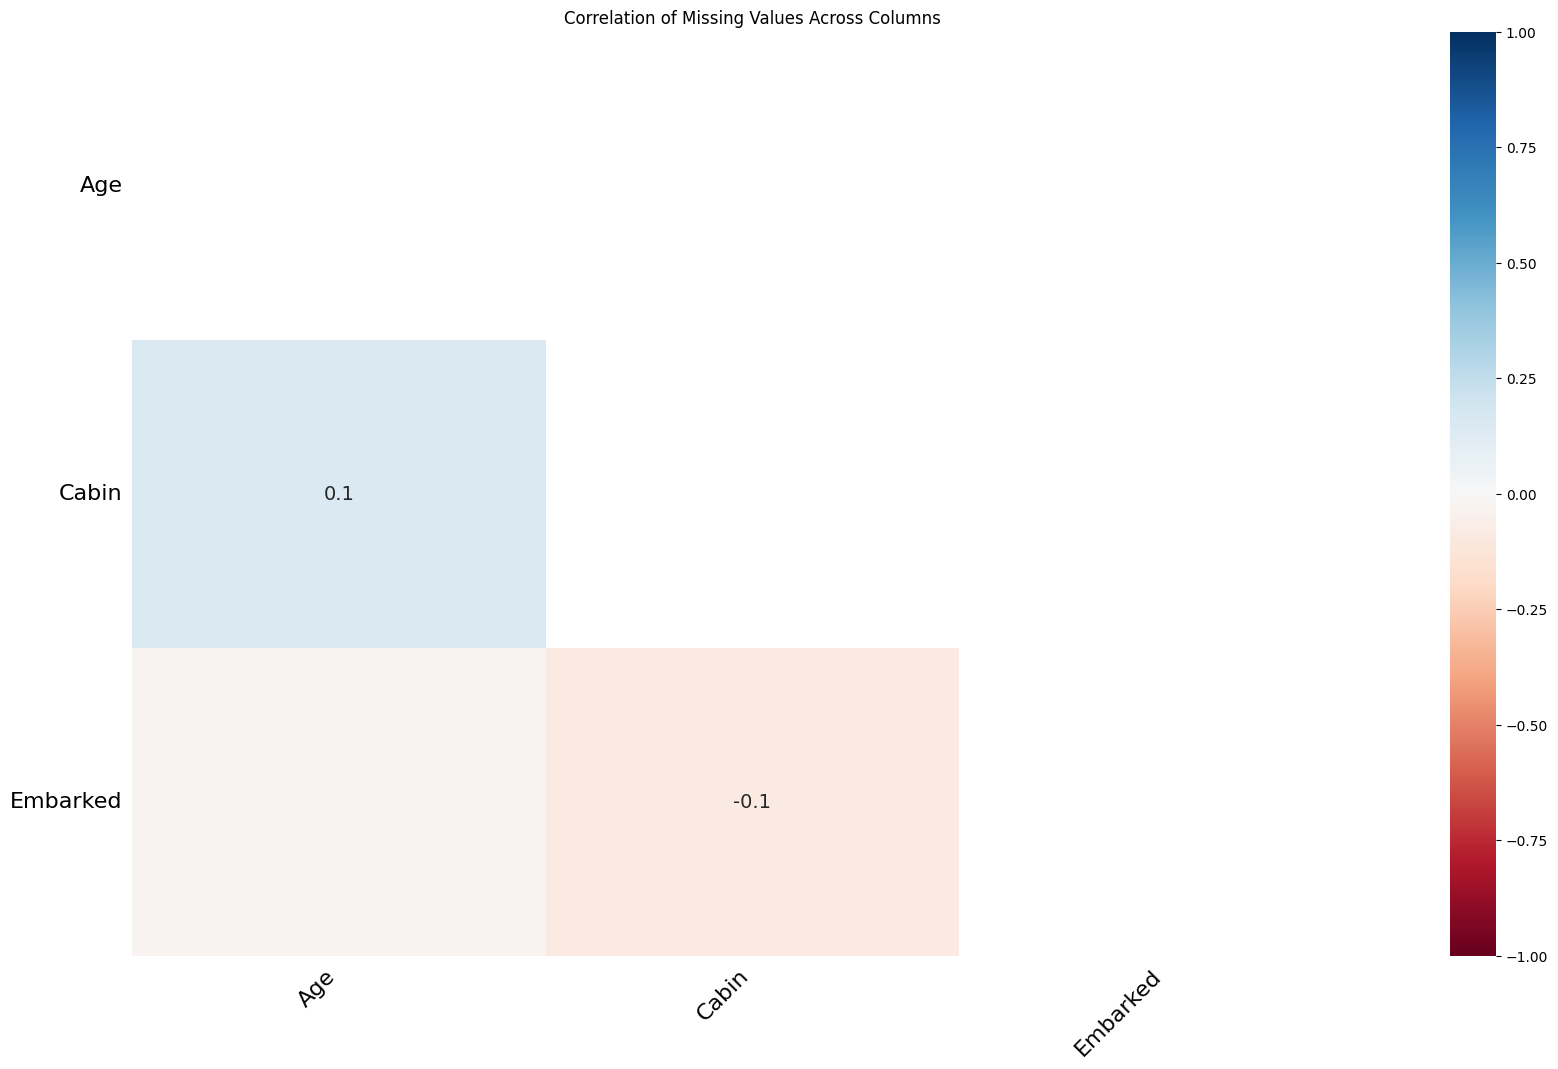

In [77]:
# Heatmap (Correlation of Missing Data)
plt.figure(figsize=(6, 4))
msno.heatmap(df)
plt.title("Correlation of Missing Values Across Columns")
plt.show()
##the correlation is low so the missing is random

In [78]:
##data imputation
##since the missing data is random we can impute the data with mean
##replace the age
df['Age']=df['Age'].fillna(round(df['Age'].mean(),2))

In [79]:
## since the missing values are more than 5% we can fill it with "MISSING"
df['Cabin']=df['Cabin'].fillna("Missing")

In [80]:
## only two mising values which is less than 5 %
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

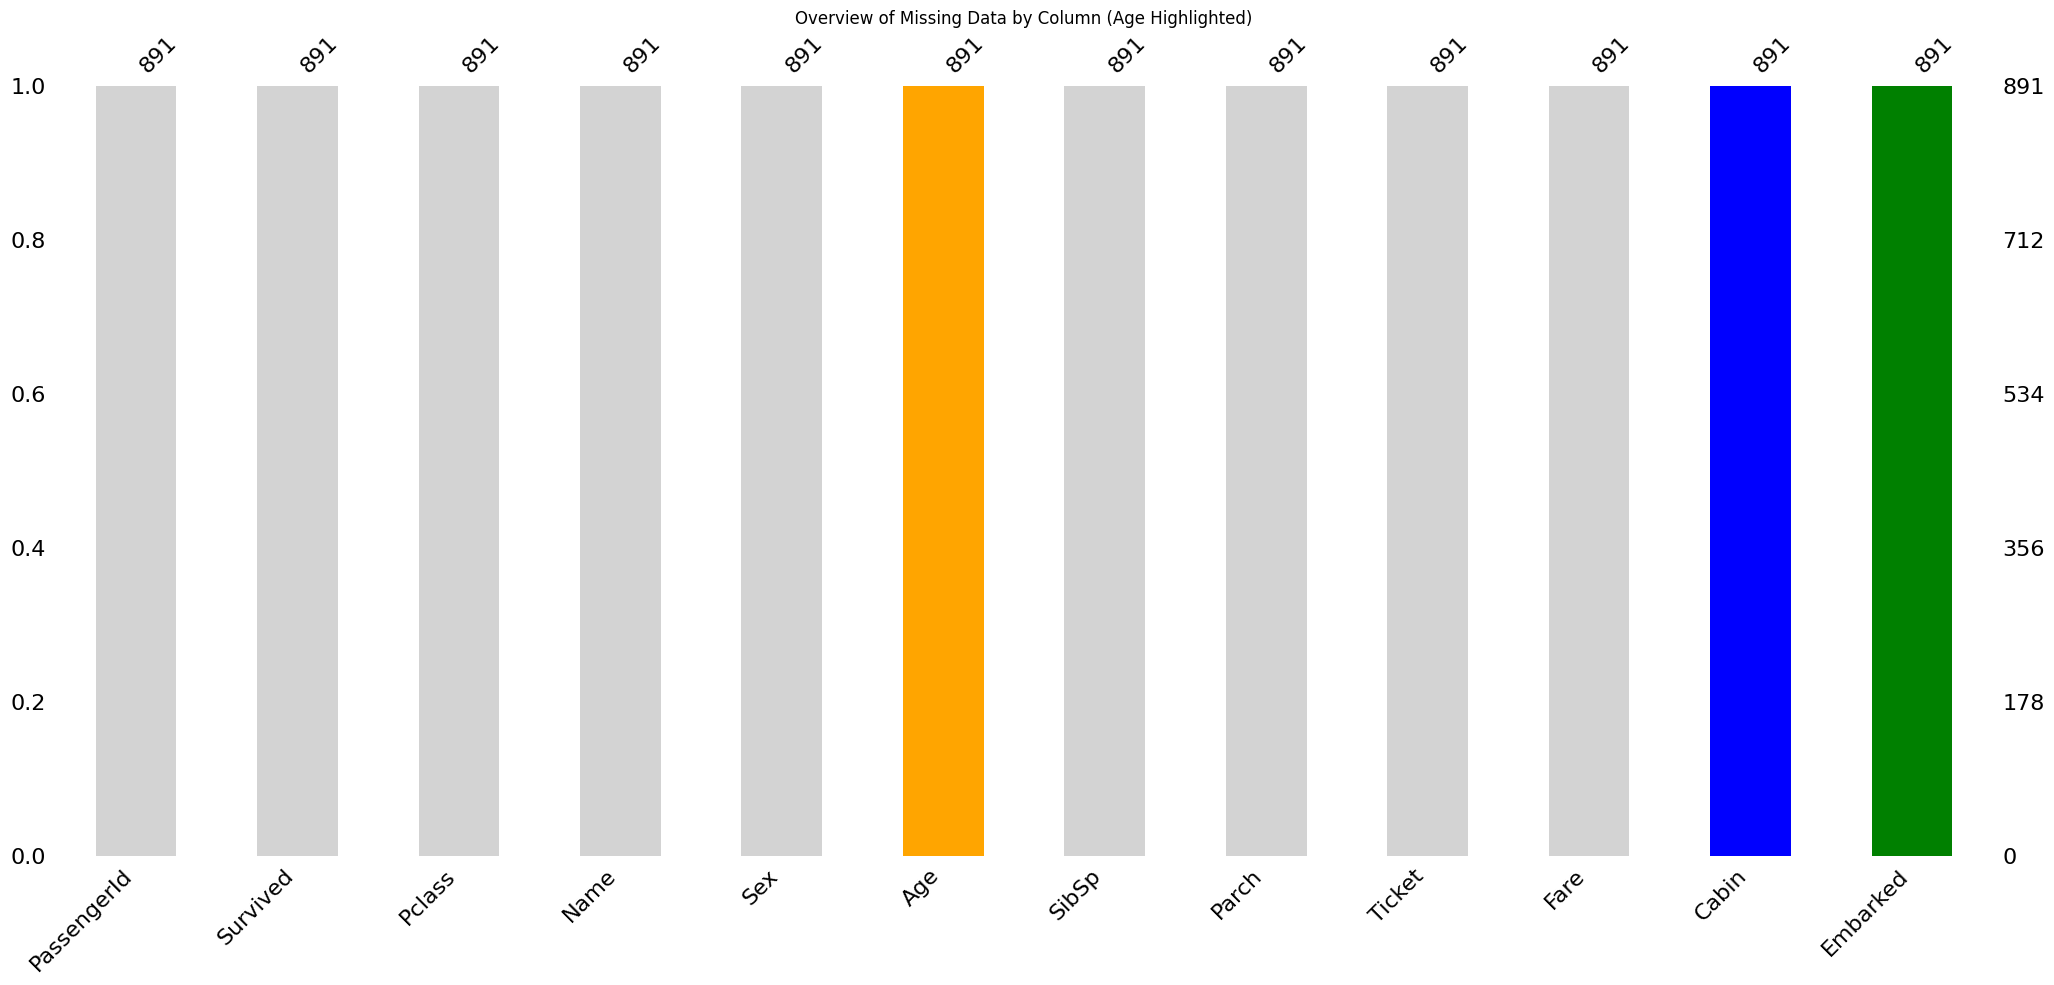

In [81]:
# Re-visualize Bar Plot (Highlight Imputed Column)
plt.figure(figsize=(12, 6))
ax = msno.bar(df, color='lightgrey')

# Highlight the Age column in a different color
for p, label in zip(ax.patches, df.columns):
    if label == 'Age':
        p.set_facecolor('orange')
    elif label =='Cabin':
        p.set_facecolor('blue')
    elif label =='Embarked':
        p.set_facecolor('green')


plt.title("Overview of Missing Data by Column (Age Highlighted)")
plt.show()

In [82]:
## data preprocessing
###Converting all categorical variable to numerical variable

df['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)


<ipython-input-82-b0a16fa0fe0d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace(['male', 'female'],
<ipython-input-82-b0a16fa0fe0d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].replace(['male', 'female'],


In [83]:
df[df['Ticket']=='113803'] ##tickets have duplicate values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1,C123,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",0,37.0,1,0,113803,53.1,C123,S


In [84]:
df_final=df

In [85]:
## remove insignificant features:

del df_final['PassengerId']
del df_final['Name']
del df_final['Cabin']
del df_final['Ticket']
del df_final['Embarked']

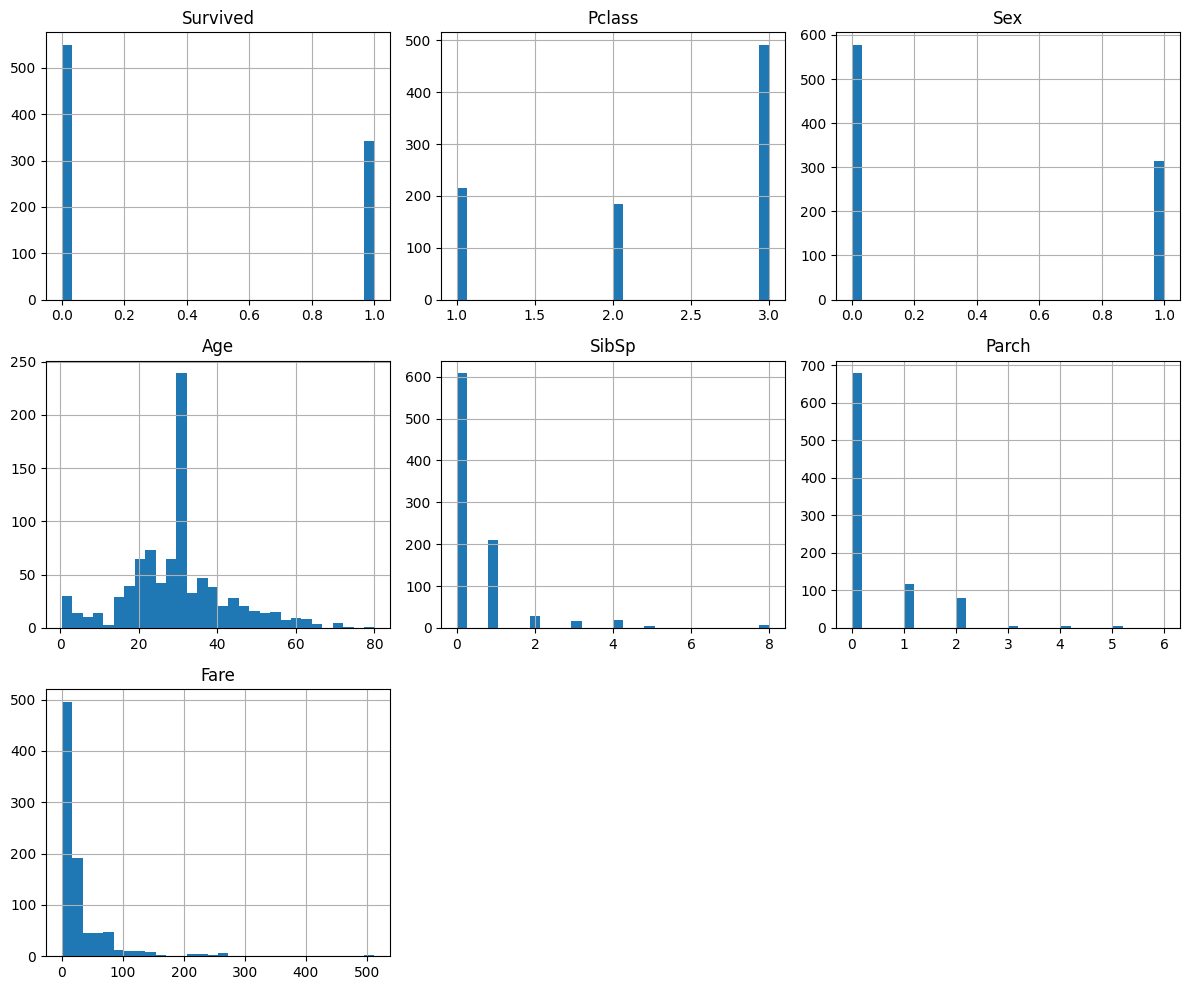

In [86]:
##check the fearure distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature in X_train (features in the dataset)
df_final.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [87]:
##checking the proportion of men and women survived
print("Total Survived",round(df_final['Survived'].sum()/len(df_final),2))
print("Females survived ",round(df_final[df_final['Sex']==1]['Survived'].sum()/len(df),2))
print("Males survived ",round(df_final[df_final['Sex']==0]['Survived'].sum()/len(df),2))

Total Survived 0.38
Females survived  0.26
Males survived  0.12


In [88]:
df_final.head()
df_final.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [89]:
###train-test split

y = df_final['Survived']
X = df_final[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'
       ]]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42,stratify=y)


In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [91]:
###arbitary model checking
#standardScaler +KNN

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

###arbitrary paramter
classifier= Pipeline([
    ("scl", StandardScaler()), ##feature scaling
    ("predictor", KNeighborsClassifier(n_neighbors=30)) ###classifier
])

##crossvalidation accuracy
print(np.mean(cross_val_score(classifier, X_train, y_train, scoring="accuracy")))
###crossvalidation error
print(round(1-np.mean(cross_val_score(classifier, X_train, y_train, scoring="accuracy")),3))

0.807633211858564
0.192


In [92]:
# standard scaler + Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifierDt=Pipeline(
    [
        ("scl", StandardScaler()),
        ("predictor", DecisionTreeClassifier())
    ]
)

# Get the validation error
print(np.mean(cross_val_score(classifierDt, X_train, y_train, scoring="accuracy")))

###crossvalidation error
round(1-np.mean(cross_val_score(classifierDt, X_train, y_train, scoring="accuracy")),3)

0.7739682852358909


np.float64(0.242)

In [93]:
# standard scaler + SVC
from sklearn.svm import SVC
classifierSVC=Pipeline(
    [
        ("scl", StandardScaler()),
        ("predictor", SVC())
    ]
)

# Get the validation error
print(np.mean(cross_val_score(classifierSVC, X_train, y_train, scoring="accuracy")))

###crossvalidation error
round(1-np.mean(cross_val_score(classifierSVC, X_train, y_train, scoring="accuracy")),3)

0.8188614202698709


np.float64(0.181)

In [96]:
##Hyper parameter tuning Standard Scaler with SVC classifier


from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# pipeline with SVC classifier
classifierSVC = Pipeline([
    ("scl", MinMaxScaler()),  # Feature scaling
    ("predictor", SVC())  # Support Vector Classifier
])

# hyperparameters for the pipeline with an SVC classifier
svc_param_grid = {
    "predictor__C": [ 5,10],  # Regularization parameter (C)
    "predictor__kernel": ["rbf"],  # Kernel type to use in SVC
    "predictor__gamma": ["scale", "auto",0.01, 0.1,1],  # Kernel coefficient
    'predictor__degree': [2],
}

#GridSearchCV object to search for the best hyperparameters
svc_gs = GridSearchCV(classifierSVC, svc_param_grid, scoring="accuracy", cv=5)

# Fit the grid search on the training data
svc_gs.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {svc_gs.best_params_}")
print(f"Best cross-validation accuracy: {svc_gs.best_score_}")


Best parameters found: {'predictor__C': 10, 'predictor__degree': 2, 'predictor__gamma': 1, 'predictor__kernel': 'rbf'}
Best cross-validation accuracy: 0.818881118881119


In [97]:
from sklearn.metrics import accuracy_score

classifierSVC.set_params(**svc_gs.best_params_)
classifierSVC.fit(X_train, y_train)
print(accuracy_score(y_train, classifierSVC.predict(X_train)))
print(accuracy_score(y_test, classifierSVC.predict(X_test)))

0.8258426966292135
0.8156424581005587
